In [1]:
# Module imports
# import modules for use below
# (Note: Modules specific to particular machine learning examples are imported in the relevant code block)
# 'as' allows use of an abbreviated module name
import matplotlib.pyplot as plt     # Matplotlib for low-level plot details
import numpy as np                  # NumPy for fast numeric operations
import pandas as pd                 # Pandas for datasets
import seaborn as sns               # Seaborn for easier plotting

In [2]:
# set a random number generator seed to allow reproducibility
seed = 12345

In [3]:
# from google.colab import files  # uncomment if using colab
# uploades = files.upload()  # uncomment if using colab

In [4]:
# Read the data into a pandas dataframe for futher analysis
df = pd.read_csv('./bank-additional.csv', sep=';')

In [5]:
# View the first few rows to check all looks normal
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
# Depending on your notebook settings this might not show all columns - if it isn't, we can change this
pd.options.display.max_columns = None
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Data Cleaning

Step 1: choose which 'treatment' effect you want to analyse

Step 2: Removing unneeded data

Step 3: Transforming data - in this case, transforming categorical data into binary data (one hot encoding)
Notes:

-When working with Pandas axis=0 means a row operation and axis=1 means a column operation.

-The a subset of columns can be selected by creating a list of names e.g. ['var1', 'var2'].

In [7]:
# Step 1: choose which 'treatment' effect you want to analyse

# Below, you need to choose ONE way to define your treated variable

# #Choice 1:
# # create a binary indicator for whether person was contacted or not in PREVIOUS marketing campaign 
# # (pdays = 999 if they weren't contacted at all)
# df['treated'] = df['pdays'].apply(lambda row: 0 if row == 999 else 1)
# df[['treated', 'pdays']].head()
# df['treated'].describe()

##NOTE: if you choose "previous campaign variables - becareful of the issue of downstream effects of treatment 
# (see Ugly controls slide)"


# #Choice 2
# # create a binary indicator for whether person was contacted or not in marketing campaign 
# # (campaign = NA if they weren't contacted at all) - eveyone was contacted
# df['treated'] = df['campaign'].apply(lambda row: 0 if row <= 0 else 1)
# df[['treated', 'campaign']].head()
# df['treated'].describe()
## Should you really choose this one - take a look at the variance of the variable

# #Choice 3
# # create a duration indicator 
# df['treated'] = df['duration']
# df[['treated', 'duration']].head()
# df.head(n=10)

# #Choice 4
# Recode the flower types into the binary classes
# df[treated'] = df["contact"].replace({"cellular": 1, "telephone": 0})
# print(df[mobile].value_counts())

# I choose Choice 1

#Choice 1
# create a binary indicator for whether person was contacted or not in PREVIOUS marketing campaign 
# (pdays = 999 if they weren't contacted at all)
df['treated'] = df['pdays'].apply(lambda row: 0 if row == 999 else 1)
df[['treated', 'pdays']].head()
df['treated'].describe()


count    4119.000000
mean        0.038844
std         0.193247
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: treated, dtype: float64

In [8]:
df['treated'].describe()

count    4119.000000
mean        0.038844
std         0.193247
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: treated, dtype: float64

In [9]:
df.head(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


In [10]:
#Step 2: Removing unneeded data

#now you want to drop the other variables that are 'similar' definitions of treatment: refer to the slide on 'Bad controls'
# essentially, if you leave them in, you will have a collinearity issue where the variance of your treatment effect will be 
# too large

# also think about other 'ugly' controls: things that are downstream of the treatment

# Note - `inplace=True` affects the current dataframe directly
#  - otherwise we would need to assign the returned dataframe to a new variable

# What are the bad controls? 
df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign',  ], axis=1, inplace=True)


In [11]:
df.head(n=10)

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


In [12]:
# #Now what about the previous campaign variables?

# # create a binary indicator for whether person was contacted or not in PREVIOUS marketing campaign 
# # (pdays = 999 if they weren't contacted at all)
# df['pdays_new'] = df['pdays'].apply(lambda row: 0 if row == 999 else 1)
# df[['pdays_new', 'pdays']].head()
# df['pdays_new'].describe()



In [13]:
# and how correlated is this variable to my treated variable?

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df[["treated", "pdays"]].corr()


,treated,pdays
treated,1.000000,-0.999992
pdays,-0.999992,1.000000


In [14]:
df[["treated", "previous"]].corr()


,treated,previous
treated,1.000000,0.588067
previous,0.588067,1.000000


In [15]:
# now I notice the previous and pdays_new are the same?
df[["treated", "previous"]].corr()
#so later I can just drop previous (and not create a new variable for this one)

,treated,previous
treated,1.000000,0.588067
previous,0.588067,1.000000


In [16]:
df[["treated", "poutcome"]].corr()

# notice why you get an error - you need to recode poutcome

C:\Users\annaz\AppData\Local\Temp\ipykernel_34764\2018710121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[["treated", "poutcome"]].corr()


,treated
treated,1.0


In [17]:
# recoding poutcome
df['poutcome_new'] = df["poutcome"].replace({"success": 1, "nonexistent": 0, "failure": 0})
print(df['poutcome_new'].value_counts())
df.head(n=10)


0    3977
1     142
Name: poutcome_new, dtype: int64


,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,services,single,high.school,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,0
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
5,32,services,single,university.degree,no,no,no,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0,0
6,32,admin.,single,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
8,31,services,divorced,professional.course,no,no,no,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0


In [18]:
df[["treated", "poutcome_new"]].corr()

,treated,poutcome_new
treated,1.000000,0.939938
poutcome_new,0.939938,1.000000


In [19]:
#ok I am confident that the previous campaign variables can be left in
# but since I have created new variables, I will drop the redundant ones (old ones)

df.drop(['pdays', 'previous', 'poutcome',  ], axis=1, inplace=True)


In [20]:
df.head(n=10)

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,no,0,0
6,32,admin.,single,university.degree,no,yes,no,-1.1,94.199,-37.5,0.879,4963.6,no,0,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
8,31,services,divorced,professional.course,no,no,no,-0.1,93.200,-42.0,4.153,5195.8,no,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0


In [21]:
# Step 3: Transforming data - in this case, transforming categorical data into binary data (one hot encoding) 

# `y` is currently a text column - encode all 'yes' values as `1`, everything else as `0` 
# and store in a column named 'y_encoded' (this will be our final target array)
df['y_encoded'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=10)


,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,0
6,32,admin.,single,university.degree,no,yes,no,-1.1,94.199,-37.5,0.879,4963.6,no,0,0,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0
8,31,services,divorced,professional.course,no,no,no,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0


In [22]:
# repeat for 'job'
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
# view the 'new' and original columns
pd.concat([df['job'], job_dummies], axis=1).head()


,job,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,blue-collar,0,1,0,0,0,0,0,0,0,0,0
1,services,0,0,0,0,0,0,0,1,0,0,0
2,services,0,0,0,0,0,0,0,1,0,0,0
3,services,0,0,0,0,0,0,0,1,0,0,0
4,admin.,1,0,0,0,0,0,0,0,0,0,0


In [23]:
# the 'marital' column is nominal data - there are several different categories, for which ordering doesn't make sense
# we will use the pandas 'get_dummies' method to create a different binary column for each status
# NOTE: This will create several columns named 'marital_...' for each category
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')

# view the 'new' and original columns
pd.concat([df['marital'], marital_dummies], axis=1).head()
# now drop the new 'marital_unknown' variable
marital_dummies.drop('marital_unknown', axis=1, inplace=True)
# merge new dummies into main dataframe
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0


In [24]:
# and 'education'
# Note: Education is a Ordinal value (the categories have an innate order,
# and would usually be encoded using an OrdinalEncoder 
# - for simplicity here we are again using simple binary dummy values)
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1


In [25]:
df['default_encoded'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=10)

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,32,admin.,single,university.degree,no,yes,no,-1.1,94.199,-37.5,0.879,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,31,services,divorced,professional.course,no,no,no,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [26]:
df['housing_encoded'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=10)


,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,32,admin.,single,university.degree,no,yes,no,-1.1,94.199,-37.5,0.879,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
7,41,entrepreneur,married,university.degree,unknown,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8,31,services,divorced,professional.course,no,no,no,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [27]:
df['loan_encoded'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=10)

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
5,32,services,single,university.degree,no,no,no,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,32,admin.,single,university.degree,no,yes,no,-1.1,94.199,-37.5,0.879,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8,31,services,divorced,professional.course,no,no,no,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
9,35,blue-collar,married,basic.9y,unknown,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# NOTE: we use `copy` to ensure that `X` and `y` are not simply views into the existing datagrame
y = df['y_encoded'].copy()
X = df.copy()
X.drop(['y_encoded', 'y'], axis=1, inplace=True)


In [29]:
#drop  the 'original' variables (now encoded as other columns)
X.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', ], axis=1, inplace=True)

In [30]:
# Review the final dataframe
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   emp.var.rate                   4119 non-null   float64
 2   cons.price.idx                 4119 non-null   float64
 3   cons.conf.idx                  4119 non-null   float64
 4   euribor3m                      4119 non-null   float64
 5   nr.employed                    4119 non-null   float64
 6   treated                        4119 non-null   int64  
 7   poutcome_new                   4119 non-null   int64  
 8   marital_divorced               4119 non-null   uint8  
 9   marital_married                4119 non-null   uint8  
 10  marital_single                 4119 non-null   uint8  
 11  education_basic.4y             4119 non-null   uint8  
 12  education_basic.6y             4119 non-null   u

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [32]:
pd.options.display.max_columns = None
df.describe(include='all')

,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
count,4119.000000,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
unique,NaN,12,4,8,3,3,3,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1012,2509,1264,3315,2175,3349,NaN,NaN,NaN,NaN,NaN,3668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN,0.038844,0.034474,0.109493,0.108279,0.609128,0.279922,0.104151,0.055353,0.139354,0.223598,0.000243,0.129886,0.306871,0.000243,0.528041,0.161447
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN,0.193247,0.182466,0.312294,0.310770,0.488005,0.449015,0.305494,0.228696,0.346358,0.416706,0.015581,0.336219,0.461251,0.015581,0.499274,0.367987
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [33]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan'  ], axis=1, inplace=True)

In [34]:
# Review the final target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_encoded
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


Assignment Questions
1) Summarise and describe the data
a) Print the first 20 rows of data

In [35]:
df.head(n=20)

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
0,30,-1.8,92.893,-46.2,1.313,5099.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,25,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,38,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,47,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
5,32,-1.1,94.199,-37.5,0.884,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,32,-1.1,94.199,-37.5,0.879,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
7,41,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8,31,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
9,35,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [36]:
df.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,treated,poutcome_new,y_encoded,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.038844,0.034474,0.109493,0.108279,0.609128,0.279922,0.104151,0.055353,0.139354,0.223598,0.000243,0.129886,0.306871,0.000243,0.528041,0.161447
std,10.313362,1.563114,0.579349,4.594578,1.733591,73.667904,0.193247,0.182466,0.312294,0.310770,0.488005,0.449015,0.305494,0.228696,0.346358,0.416706,0.015581,0.336219,0.461251,0.015581,0.499274,0.367987
min,18.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,88.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


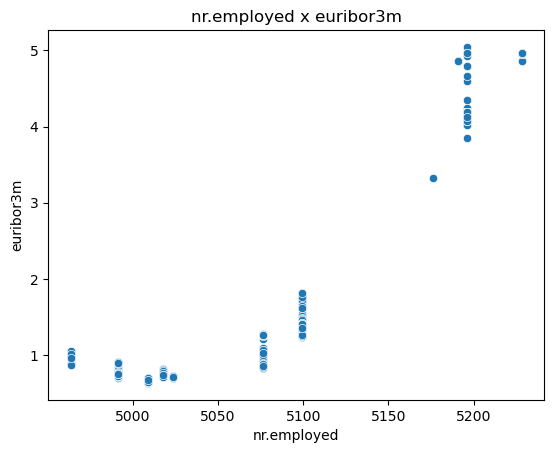

In [37]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=X, x="nr.employed", y="euribor3m")\
       .set(title="nr.employed x euribor3m", xlabel="nr.employed", ylabel="euribor3m")
plt.show()

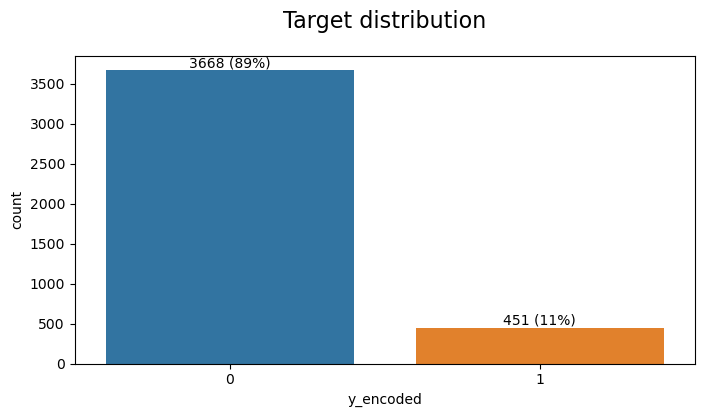

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=y, ax=ax)

abs_vals = y.value_counts()
rel_vals = y.value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.show()

In [39]:
# uncomment below and choose which columns to exclude
excluded_columns = ['y', 'y_encoded']
# excluded_columns = ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
#        'euribor3m', 'nr.employed', 'y', 'is_default', 'is_housing', 'is_loan',
#        'treated', 'marital_divorced', 'marital_married', 'marital_single',
#        'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
#        'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
#        'education_high.school', 'education_illiterate',
#        'education_professional.course', 'education_university.degree']

X_final = df.drop(excluded_columns, axis=1)
X_final

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,treated,poutcome_new,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_encoded,housing_encoded,loan_encoded
0,30,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,25,1.4,94.465,-41.8,4.962,5228.1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,38,1.4,94.465,-41.8,4.959,5228.1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,47,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1.4,93.918,-42.7,4.958,5228.1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
4115,39,1.4,93.918,-42.7,4.959,5228.1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4116,27,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4117,58,1.4,93.444,-36.1,4.966,5228.1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [40]:
# Training and Test Data
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Setting random_state means the split will always be the same which sometimes is useful.
X_train, X_test, y_train, y_test =\
    train_test_split(X_final, y, test_size=0.3, random_state=seed)

# Output the dimensions of each of the sets
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

#why keep getting error "inconsistent number of samples"

X_train is (2883, 21)
X_test is (1236, 21)
y_train is (2883,)
y_test is (1236,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

# Setup a Decision Tree 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=20, min_samples_split=2, random_state=seed)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

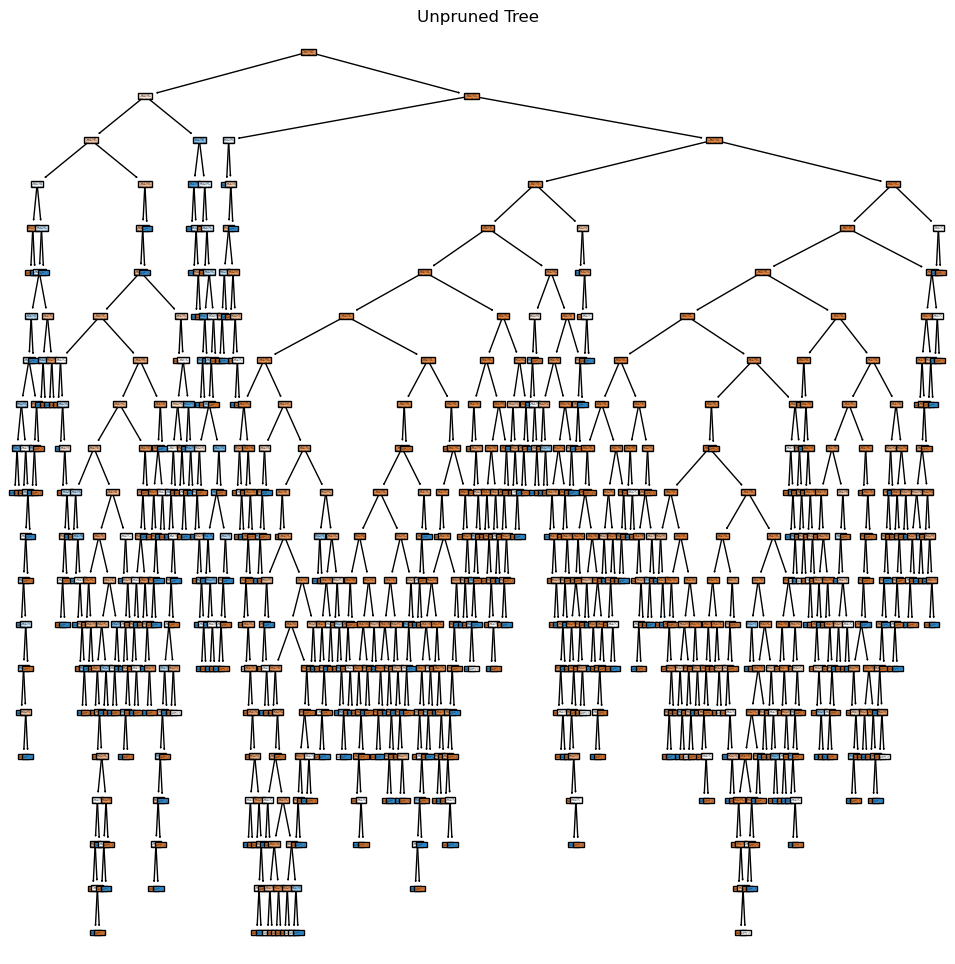

In [42]:
from sklearn.tree import plot_tree
# Plot Decision Tree using the lower-level plotting functions
# NOTE: This may take some time to complete
plt.figure(figsize=(12,12))
plot_tree(dt_model, filled=True)
plt.title("Unpruned Tree")
plt.show()

In [43]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(dt_model.feature_names_in_)):
    print(f"{dt_model.feature_names_in_[i]}: {dt_model.feature_importances_[i]:.4f}")

age: 0.2206
emp.var.rate: 0.0052
cons.price.idx: 0.0194
cons.conf.idx: 0.0442
euribor3m: 0.2495
nr.employed: 0.1732
treated: 0.0024
poutcome_new: 0.0337
marital_divorced: 0.0115
marital_married: 0.0344
marital_single: 0.0294
education_basic.4y: 0.0138
education_basic.6y: 0.0137
education_basic.9y: 0.0107
education_high.school: 0.0210
education_illiterate: 0.0000
education_professional.course: 0.0160
education_university.degree: 0.0203
default_encoded: 0.0000
housing_encoded: 0.0479
loan_encoded: 0.0332


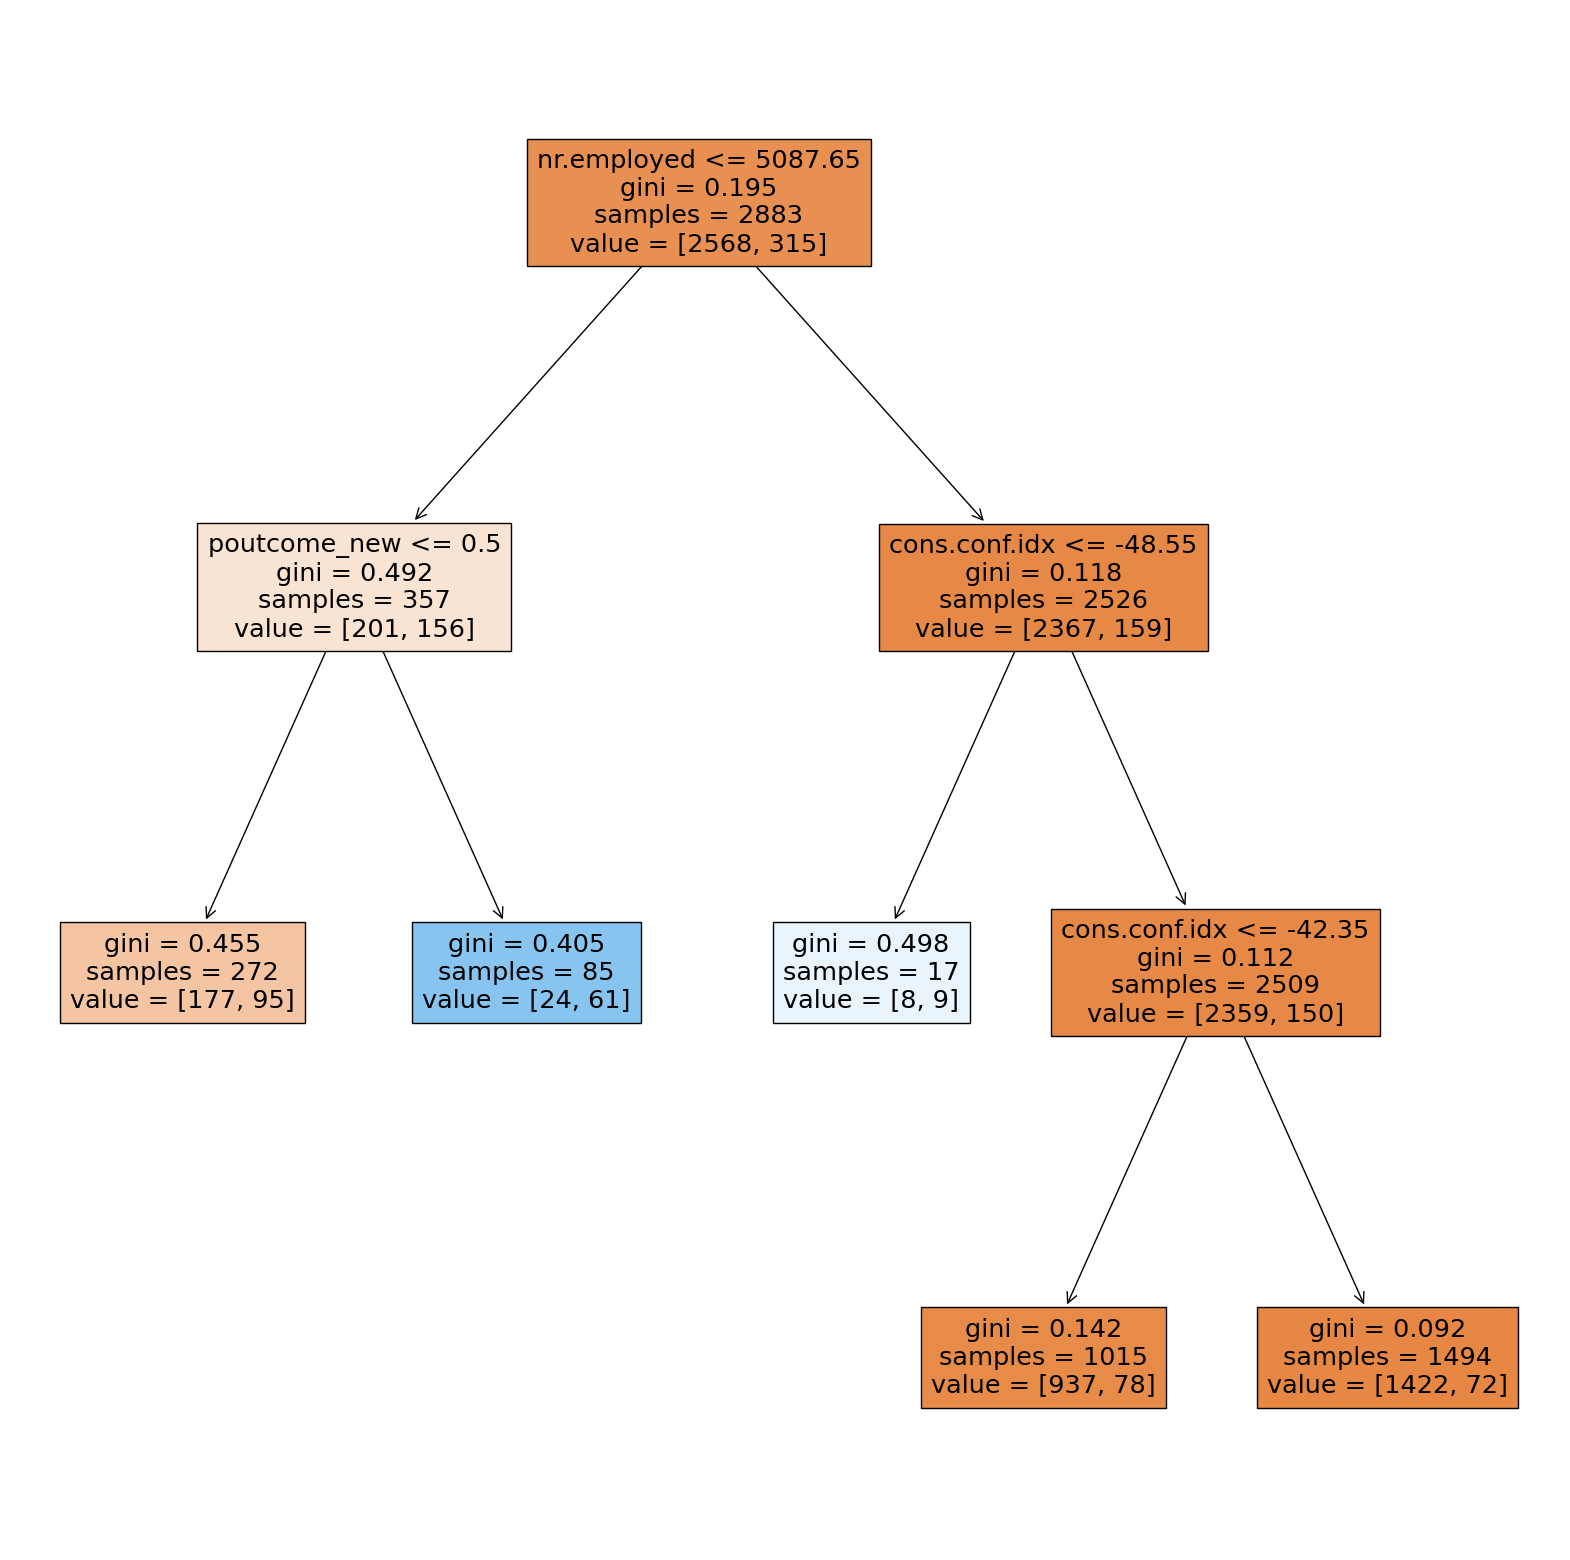

In [44]:
# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.linspace(1, 50, 50, dtype='int16'),
    'min_samples_split': np.linspace(0.1, 1.0, 10),
}

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='gini', random_state=seed), 
    param_grid=param_grid)

# Fir
gs.fit(X=X_train, y=y_train)

# Predicting the test set
y_pred = gs.predict(X_test)
plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

In [45]:
# Accuracy of the test set
gs.score(X=X_test, y=y_test)

0.901294498381877

In [46]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 0.1}

In [47]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(gs.best_estimator_.feature_names_in_)):
    print(f"{gs.best_estimator_.feature_names_in_[i]}: {gs.best_estimator_.feature_importances_[i]:.4f}")

age: 0.0000
emp.var.rate: 0.0000
cons.price.idx: 0.0000
cons.conf.idx: 0.0743
euribor3m: 0.0000
nr.employed: 0.7708
treated: 0.0000
poutcome_new: 0.1548
marital_divorced: 0.0000
marital_married: 0.0000
marital_single: 0.0000
education_basic.4y: 0.0000
education_basic.6y: 0.0000
education_basic.9y: 0.0000
education_high.school: 0.0000
education_illiterate: 0.0000
education_professional.course: 0.0000
education_university.degree: 0.0000
default_encoded: 0.0000
housing_encoded: 0.0000
loan_encoded: 0.0000


In [48]:
#LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [49]:
# Here we use a scikit-learn pipeline, incorporating a standard scaler, rather than just the Lasso estimator
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',Lasso())
])

In [50]:
search = GridSearchCV(pipeline,
    {'model__alpha':np.arange(0.1,10,0.1)},
    cv = 2, scoring="neg_mean_squared_error")

In [51]:
_ = search.fit(X_train,y_train)

In [52]:
search.best_params_

{'model__alpha': 0.1}

In [53]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [54]:
importance = np.abs(coefficients)

In [55]:
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.57763743e-05, 5.33673694e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [56]:
np.array(X.columns)[importance > 0]

array(['nr.employed', 'treated'], dtype=object)

In [57]:
np.array(X.columns)[importance == 0]

array(['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'poutcome_new', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_encoded',
       'housing_encoded', 'loan_encoded'], dtype=object)